# .


In [ ]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
from sklearn.cluster import KMeans
import numpy as np
import cv2 as cv
import urllib.request
import math

from matplotlib import pyplot as plt

In [ ]:
def autoCannyThreshold(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	return upper, lower

In [ ]:
!gdown --id '1NVjrxazHpobUqJGen4STCddJQiRIwuhp' -O citra.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NVjrxazHpobUqJGen4STCddJQiRIwuhp
To: /content/citra.jpg
100% 11.6k/11.6k [00:00<00:00, 16.1MB/s]


## input citra

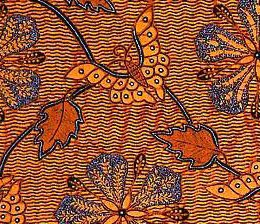

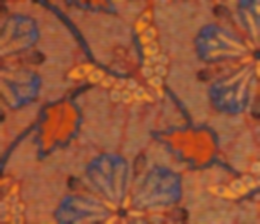

In [ ]:
img = cv.imread('citra.jpg')
imshow(img)

img = cv.GaussianBlur(img,(11,11),0)
imshow(img)

In [ ]:
img.shape

(224, 260, 3)

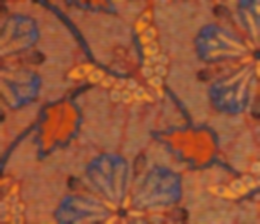

(224, 260, 3)

In [ ]:
# resize

scale_percent = 100 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
imshow(img_resized)
img_resized.shape

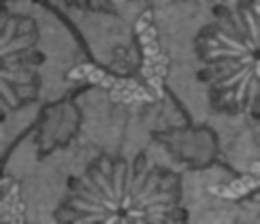

In [ ]:
img_gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
imshow(img_gray)

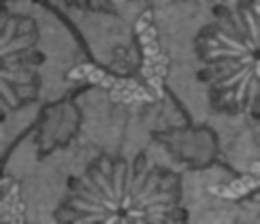

In [ ]:
# img_gaussian = cv.GaussianBlur(img_gray,(3,3),0)
img_gaussian = np.copy(img_gray)
imshow(img_gaussian)

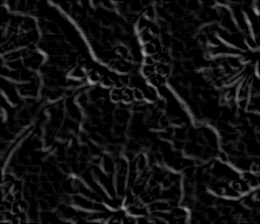

In [ ]:
# prewitt

kernelx = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
kernely = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
img_prewittx = cv.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv.filter2D(img_gaussian, -1, kernely)

img_prewitt = img_prewittx + img_prewitty

imshow(img_prewitt)

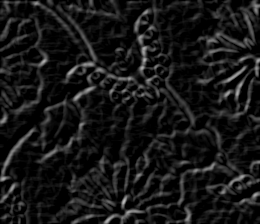

In [ ]:
#sobel
img_sobelx = cv.Sobel(img_gaussian,cv.CV_8U,1,0,ksize=3)
img_sobely = cv.Sobel(img_gaussian,cv.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely

imshow(img_sobel)

97.0


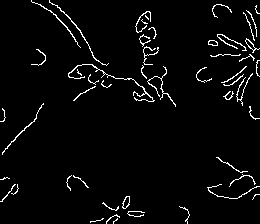

In [ ]:
# canny
# threshold untuk canny
otsu_t, _ = cv.threshold(img_gaussian,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(otsu_t)

# auto canny
upper, lower = autoCannyThreshold(img_gaussian)
img_canny_a = cv.Canny(img_gaussian, lower, upper)
imshow(img_canny_a)

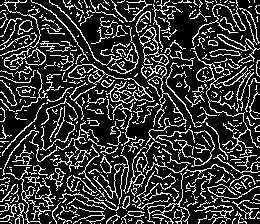

In [ ]:
# manual canny
# optimum threshold = https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny 
# low = 255/3, high = 255

# img_canny_m = cv.Canny(img_gaussian, 174, 255)
img_canny_m = cv.Canny(img_gaussian, otsu_t/3, 0)
imshow(img_canny_m)

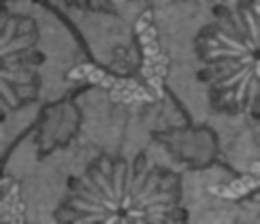

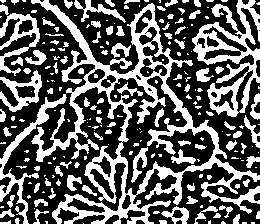

In [ ]:
imshow(img_gaussian)

img_test = cv.adaptiveThreshold(img_gaussian,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,15,2)
imshow(cv.bitwise_not(img_test))

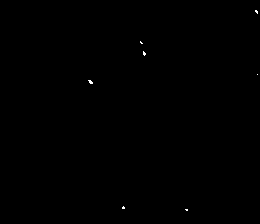

127.0



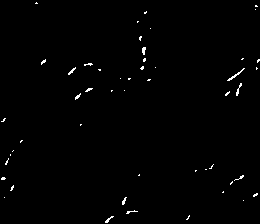

127.0


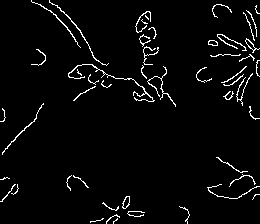

127.0


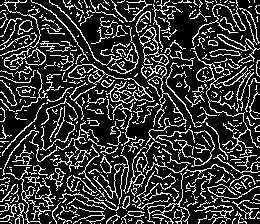

127.0


In [ ]:
# prewitt
rect,img_binary_prewitt = cv.threshold(img_prewitt,127,255,cv.THRESH_BINARY)
imshow(img_binary_prewitt)
print(rect)

print()

# sobel
rect,img_binary_sobel = cv.threshold(img_sobel,127,255,cv.THRESH_BINARY)
imshow(img_binary_sobel)
print(rect)

# auto canny
rect,img_binary_canny_a = cv.threshold(img_canny_a,127,255,cv.THRESH_BINARY)
imshow(img_binary_canny_a)
print(rect)

# manual canny
rect,img_binary_canny_m = cv.threshold(img_canny_m,127,255,cv.THRESH_BINARY)
imshow(img_binary_canny_m)
print(rect)

otsu prewitt


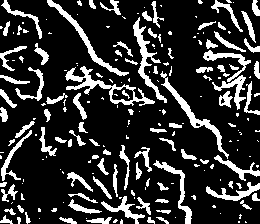

29.0

otsu sobel


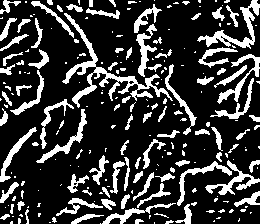

37.0
otsu auto canny


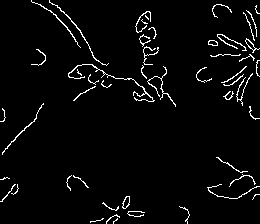

0.0
otsu manual canny


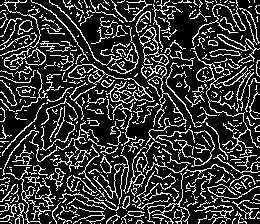

0.0


In [ ]:
# convert to binary

# prewitt
print("otsu prewitt")
rect, img_otsu_prewitt = cv.threshold(img_prewitt,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imshow(img_otsu_prewitt)
print(rect)

print()

# sobel
print("otsu sobel")
rect, img_otsu_sobel = cv.threshold(img_sobel,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imshow(img_otsu_sobel)
print(rect)

# auto canny
print("otsu auto canny")
rect, img_otsu_canny_a = cv.threshold(img_canny_a,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imshow(img_otsu_canny_a)
print(rect)

# manual canny
print("otsu manual canny")
rect, img_otsu_canny_m = cv.threshold(img_canny_m,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imshow(img_otsu_canny_m)
print(rect)

gauss prewitt


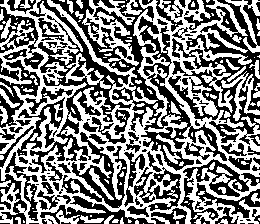


gauss sobel


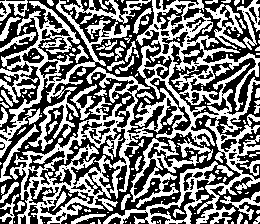

gauss auto canny


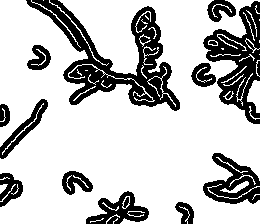

gauss auto canny


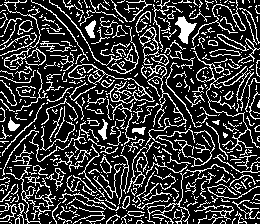

In [ ]:
# prewitt
print("gauss prewitt")
img_gauss_prewitt = cv.adaptiveThreshold(img_prewitt,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
imshow(img_gauss_prewitt)

print()

# sobel
print("gauss sobel")
img_gauss_sobel = cv.adaptiveThreshold(img_sobel,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
imshow(img_gauss_sobel)

# auto canny
print("gauss auto canny")
img_gauss_canny_a = cv.adaptiveThreshold(img_canny_a,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
imshow(img_gauss_canny_a)

# manual canny
print("gauss auto canny")
img_gauss_canny_m = cv.adaptiveThreshold(img_canny_m,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
imshow(img_gauss_canny_m)

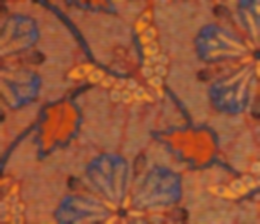

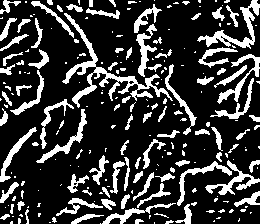

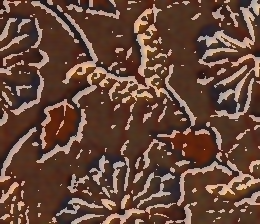

In [ ]:
"""
dari seluruh gambar diatas, kami mengambil gambar thresholding dengan ... pada detection ....
karena hasil tersebut merupakan hasil yang paling presisi dari edge detection dan thresholding lainnya.
"""

# parameter memilih thresholded image (binary(prewitt,sobel), otsu(prewitt,sobel), gauss(prewitt,sobel))
img_decision = np.copy(img_otsu_sobel)

imshow(img_resized)
imshow(img_decision)

img_decision_formatted = cv.cvtColor(img_decision, cv.COLOR_GRAY2BGR)

print()

weighted_img = cv.addWeighted(img_resized,0.5,img_decision_formatted,0.5,0)
imshow(weighted_img)

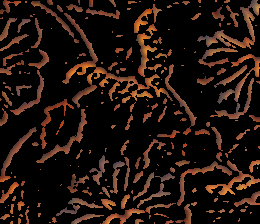

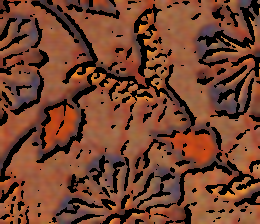

In [ ]:
# analisis menggunakan masking

mask = cv.bitwise_not(img_decision)
mask_inv = cv.bitwise_not(mask)
img_masked = cv.bitwise_and(img_resized, img_resized, mask = mask_inv)
img_masked_inv = cv.bitwise_and(img_resized, img_resized, mask = mask)
imshow(img_masked)
imshow(img_masked_inv)

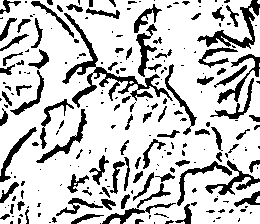

In [ ]:
# jenis - jenis kernel
# cv.getStructuringElement(cv.MORPH_RECT,(5,5))
# cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
# cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

# custom kernel
# kernel = np.array(
#     [[1,0,1],
#      [0,1,0],
#      [1,0,1]], np.uint8
# )

kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
iterations = 1
# parameter (mask or mask_inv)
src = mask

imshow(src)

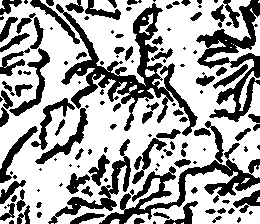

In [ ]:
# erode

img_erosion = cv.erode(src, kernel, iterations=iterations)
imshow(img_erosion)

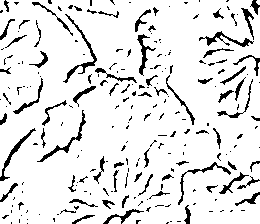

In [ ]:
# dilate

img_dilation = cv.dilate(src, kernel, iterations=iterations)
imshow(img_dilation)

gambar awal, gray


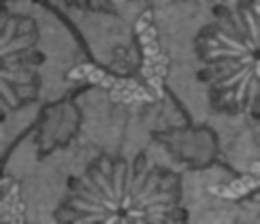

In [ ]:
print("gambar awal, gray")
imshow(img_gray)

In [ ]:
img_erosion_formatted = cv.cvtColor(img_erosion, cv.COLOR_GRAY2BGR)
img_dilation_formatted = cv.cvtColor(img_dilation, cv.COLOR_GRAY2BGR)

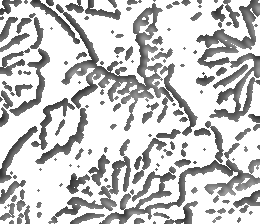

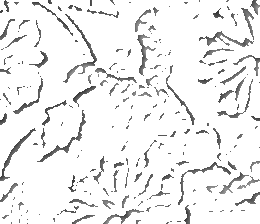

In [ ]:
img_added = cv.add(img_gray,img_erosion)
imshow(img_added)

img_added = cv.add(img_gray,img_dilation)
imshow(img_added)

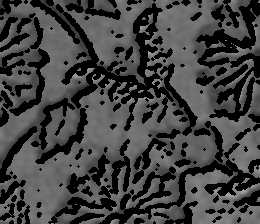

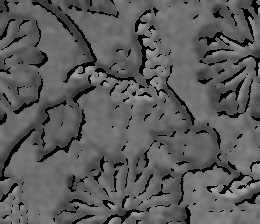

In [ ]:
# img_mask = cv.bitwise_and(img_gray, img_erosion)
img_mask = cv.bitwise_and(img_gray, img_erosion)
imshow(img_mask)

# img_mask = cv.bitwise_and(img_gray, img_dilation)
img_mask = cv.bitwise_and(img_gray, img_dilation)
imshow(img_mask)